<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Continuation

Setelah sebelumnya dilakukan scraping data dari situs web dan memilih beberapa data yang akan diuji, selanjutnya adalah pengujian data akan dilakukan di bagian ini, yang mana inti dari bagian ini adalah untuk menguji hipotesis.

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reviewer-recommendation" data-toc-modified-id="Reviewer-recommendation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reviewer recommendation</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Total-Perjalanan" data-toc-modified-id="Total-Perjalanan-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Total Perjalanan</a></span></li><li><span><a href="#Tujuan-Perjalanan" data-toc-modified-id="Tujuan-Perjalanan-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tujuan Perjalanan</a></span></li><li><span><a href="#Rata-rata-perjalanan-dari-Loop-ke-Bandara-International-O'Hare" data-toc-modified-id="Rata-rata-perjalanan-dari-Loop-ke-Bandara-International-O'Hare-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Rata rata perjalanan dari Loop ke Bandara International O'Hare</a></span></li></ul></li><li><span><a href="#Top-10" data-toc-modified-id="Top-10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Top 10</a></span><ul class="toc-item"><li><span><a href="#Top-10-Perusahaan-dengan-Jumlah-Perjalanan-Terbanyak" data-toc-modified-id="Top-10-Perusahaan-dengan-Jumlah-Perjalanan-Terbanyak-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Top 10 Perusahaan dengan Jumlah Perjalanan Terbanyak</a></span></li><li><span><a href="#Top-10-Titik-Pengantaran" data-toc-modified-id="Top-10-Titik-Pengantaran-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Top 10 Titik Pengantaran</a></span></li></ul></li><li><span><a href="#Durasi-Rata-rata-saat-hujan-di-hari-sabtu-dengan-tujuan-O'Hare-berubah-(Hipotesis)" data-toc-modified-id="Durasi-Rata-rata-saat-hujan-di-hari-sabtu-dengan-tujuan-O'Hare-berubah-(Hipotesis)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Durasi Rata-rata saat hujan di hari sabtu dengan tujuan O'Hare berubah (Hipotesis)</a></span><ul class="toc-item"><li><span><a href="#Pengujian-Hipotesis" data-toc-modified-id="Pengujian-Hipotesis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pengujian Hipotesis</a></span></li><li><span><a href="#Kesimpulan-Hipotesis" data-toc-modified-id="Kesimpulan-Hipotesis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Kesimpulan Hipotesis</a></span></li></ul></li></ul></div>

## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as st
import datetime
import matplotlib.pyplot as plt

Ada 3 data yang akan dilakukan pengujian lebih lanjut yaitu

### Total Perjalanan

Data pertama adalah total perjalanan yang dilakukan oleh masing masing perusahaan. Data yang ada hanyalah jumlah perjalanan yang dilakukan, bukan total durasi perjalanan yang dilakukan.

In [2]:
total_trips = pd.read_csv('/content/moved_project_sql_result_01.csv')

In [3]:
total_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
total_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Tipe data sudah sesuai

In [5]:
total_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Tidak ada data null

Sejauh ini datanya sudah bersih

### Tujuan Perjalanan

Data ini berisi data rata-rata tujuan akhir di bulan November 2017

In [6]:
destination_trips = pd.read_csv('/content/moved_project_sql_result_04.csv')

In [7]:
destination_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
destination_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Data dari average_trips masih menggunakan desimal, sebenarnya tidak apa apa, namun karena satuan average_trips adalah perjalanan yang selesai, maka lebih baik jika nilai ini dibulatkan, dan untuk pembulatan yang digunakan adalah pembulatan ceiling yang selanjutnya diganti tipe datanya menjadi int

In [9]:
destination_trips['average_trips'] = destination_trips['average_trips'].apply(np.ceil).astype(int)

In [10]:
destination_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
destination_trips.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


In [12]:
destination_trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Data sudah bersih

### Rata rata perjalanan dari Loop ke Bandara International O'Hare

Data ini berisi tentang durasi rata rata perjalanan dari Loop ke O'Hare

In [13]:
loop_ohare = pd.read_csv('/content/moved_project_sql_result_07.csv')

In [14]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
loop_ohare['duration_seconds'] = loop_ohare['duration_seconds'].astype(int)

In [16]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            1068 non-null   object
 1   weather_conditions  1068 non-null   object
 2   duration_seconds    1068 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.2+ KB


In [17]:
loop_ohare['start_ts']= pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')
loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100
1066,2017-11-11 08:00:00,Good,1380


In [18]:
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [19]:
loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Tidak ada data yang bermasalah

Namun untuk pembacaan yang lebih mudah, maka kolom detik akan diubah menjadi tipe date time sehingga terlihat dalam format jam: menit :detik

In [20]:
def detik(x):
    return str(datetime.timedelta(seconds=x))

In [21]:
loop_ohare['duration'] = loop_ohare['duration_seconds'].apply(detik)

In [22]:
loop_ohare

,start_ts,weather_conditions,duration_seconds,duration
0,2017-11-25 16:00:00,Good,2410,0:40:10
1,2017-11-25 14:00:00,Good,1920,0:32:00
2,2017-11-25 12:00:00,Good,1543,0:25:43
3,2017-11-04 10:00:00,Good,2512,0:41:52
4,2017-11-11 07:00:00,Good,1440,0:24:00
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,0:00:00
1064,2017-11-11 10:00:00,Good,1318,0:21:58
1065,2017-11-11 13:00:00,Good,2100,0:35:00
1066,2017-11-11 08:00:00,Good,1380,0:23:00


Selanjutnya adalah menambahkan nama hari, karena nantinya akan dicari data yang hanya hari sabtu

In [23]:
loop_ohare['days'] = loop_ohare['start_ts'].dt.day_name()

In [24]:
loop_ohare

,start_ts,weather_conditions,duration_seconds,duration,days
0,2017-11-25 16:00:00,Good,2410,0:40:10,Saturday
1,2017-11-25 14:00:00,Good,1920,0:32:00,Saturday
2,2017-11-25 12:00:00,Good,1543,0:25:43,Saturday
3,2017-11-04 10:00:00,Good,2512,0:41:52,Saturday
4,2017-11-11 07:00:00,Good,1440,0:24:00,Saturday
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,0:00:00,Saturday
1064,2017-11-11 10:00:00,Good,1318,0:21:58,Saturday
1065,2017-11-11 13:00:00,Good,2100,0:35:00,Saturday
1066,2017-11-11 08:00:00,Good,1380,0:23:00,Saturday


Pengolahan data selanjutnya ada dibagian selanjutnya

## Top 10

Dari data total_trips dan destination_trips, dicari top 10 nya

### Top 10 Perusahaan dengan Jumlah Perjalanan Terbanyak

In [25]:
total_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


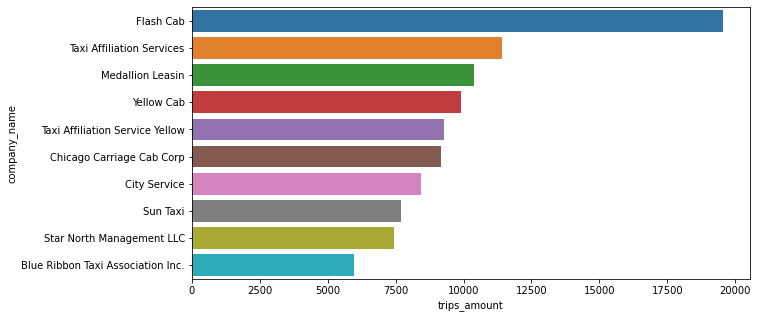

In [26]:
plt.figure(figsize=(10,5))
sb.barplot(data=total_trips.head(10), y='company_name', x='trips_amount')
plt.show()

Dari grafik yang diperlihatkan, bahwa perusahaan yang paling sering digunakan adalah Flash Cab, yang jumlahnya hampir 2 kali lipat dari perusahan ke 2 yaitu Taxi Affiliation Services.

### Top 10 Titik Pengantaran

In [27]:
destination_trips

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
...,...,...
89,Mount Greenwood,4
90,Hegewisch,4
91,Burnside,3
92,East Side,2


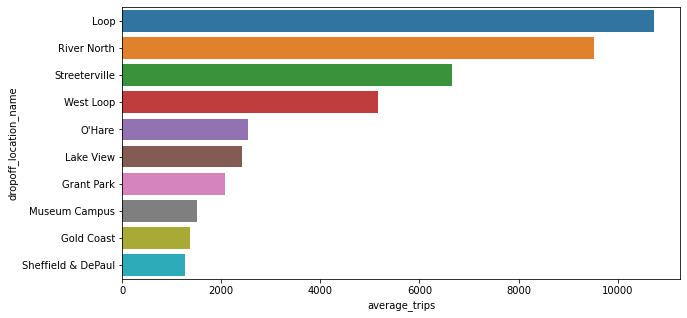

In [28]:
plt.figure(figsize=(10,5))
sb.barplot(data=destination_trips.head(10), y='dropoff_location_name', x='average_trips')
plt.show()

Dari grafik yang diperlihatkan di atas, titik pengantaran terbanyak adalah ke daerah Loop. 

Dari data yang saya baca di google
1. Loop adalah daerah chicago yang menjadi pusat distrik pembelanjaan, shopping.
2. River North adalah daerah chicago yang memiliki daya tarik di bidang karya seni dan desain.
3. Streeterville adalah daerah chicago yang merupakan distrik sejarah, seperti banyaknya museum dan lain lain.
4. West Loop adalah daerah chicago yang merupakan tempat di chicago yang banyak dikunjungi karena wisata makanannya.
5. O'Hare adalah daerah chicago yang memiliki bandara international.

Dari data diatas, ditemukan bahwa kebanyakan orang Chicago atau turis yang datang ke Chicago menggunakan jasa transportasi untuk:
1. Belanja
2. Rekreasi
3. Pergi ke Bandara

## Durasi Rata-rata saat hujan di hari sabtu dengan tujuan O'Hare berubah (Hipotesis)

Dengan menggunakan data hasil dari seleksi SQL, kita diminta untuk mencari hipotesis tentang durasi rata rata perjalanan disaat hujan pada hari sabtu dengan tujuan O'Hare

In [29]:
loop_ohare

,start_ts,weather_conditions,duration_seconds,duration,days
0,2017-11-25 16:00:00,Good,2410,0:40:10,Saturday
1,2017-11-25 14:00:00,Good,1920,0:32:00,Saturday
2,2017-11-25 12:00:00,Good,1543,0:25:43,Saturday
3,2017-11-04 10:00:00,Good,2512,0:41:52,Saturday
4,2017-11-11 07:00:00,Good,1440,0:24:00,Saturday
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,0:00:00,Saturday
1064,2017-11-11 10:00:00,Good,1318,0:21:58,Saturday
1065,2017-11-11 13:00:00,Good,2100,0:35:00,Saturday
1066,2017-11-11 08:00:00,Good,1380,0:23:00,Saturday


In [30]:
loop_ohare['days'].unique()

array(['Saturday'], dtype=object)

Dari data diatas, karena datanya sudah hanya dalam hari sabtu, maka kita seleksi hanya pada kondisi cuaca yang "Bad"

In [31]:
saturday_rain = loop_ohare.query('weather_conditions == "Bad"').duration_seconds

In [32]:
saturday_rain

6       2969
30      1980
34      2460
51      2760
52      2460
        ... 
1031    2560
1032    1908
1053    2400
1061    2186
1067    2834
Name: duration_seconds, Length: 180, dtype: int64

Sip, data terkait perjalanan di cuaca buruk dan di hari sabtu sudah diperoleh.

In [33]:
saturday_rain.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Selanjutnya adalah menyeleksi yang bukan hari sabtu dan cuacanya bagus

In [34]:
not_saturday_rain = loop_ohare.query('weather_conditions == "Good"').duration_seconds

In [35]:
not_saturday_rain 

0       2410
1       1920
2       1543
3       2512
4       1440
        ... 
1062    1500
1063       0
1064    1318
1065    2100
1066    1380
Name: duration_seconds, Length: 888, dtype: int64

### Pengujian Hipotesis

Sekarang saatnya menguji hipotesis, diambil bahwa
- H0 : Durasi perjalanan di hari sabtu saat hujan berbeda dengan hari sabtu saat cuaca biasa.
- H1 : Durasi perjalanan di hari sabtu saat hujan sama dedngan hari sabtu saat cuaca biasa.

In [36]:
pv1 = st.ttest_ind(saturday_rain,not_saturday_rain,equal_var=False).pvalue
print(f'pvalue = {pv1}')
if pv1 < 0.05:
    print("H0 ditolak, Durasi perjalanan di hari sabtu saat hujan sama dengan hari sabtu saat cuaca biasa")
else:
    print("H0 diterima, Durasi perjalanan di hari sabtu saat hujan berbeda dengan hari sabtu saat cuaca biasa") 

pvalue = 6.738994326108734e-12
H0 ditolak, Durasi perjalanan di hari sabtu saat hujan sama dengan hari sabtu saat cuaca biasa


In [37]:
print(f'Durasi rata rata saat hujan adalah {saturday_rain.mean()} detik')
print(f'Durasi rata rata saat tidak hujan adalah {not_saturday_rain.mean()} detik')

Durasi rata rata saat hujan adalah 2427.2055555555557 detik
Durasi rata rata saat tidak hujan adalah 1999.6756756756756 detik


[Text(0.5, 0, 'Kondisi'), Text(0, 0.5, 'durasi')]

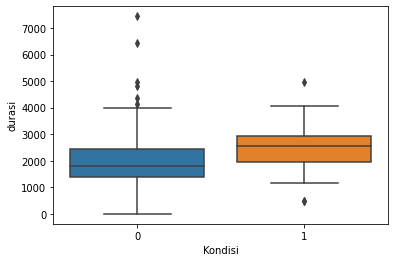

In [38]:
sb.boxplot(data=(not_saturday_rain,saturday_rain)).set(xlabel='Kondisi', ylabel='durasi')

0 adalah ketika cerah, dan 1 adalah ketika hujan.

Jika dilihat dari persebaran data pada durasi perjalanan saat cerah, memang kebanyakan ada dibawah rata rata durasi perjalanan saat hujan. Namun, jika dilihat lagi ada beberapa perjalanan saat cerah yang diatas bahkan kuartil 3 dari saat hujan.

Jadi, dengan alfa sebesar 5%, hipotesis 0 tetap ditolak, yang berarti bahwa durasi rata rata perjalanan ketika cerah maupun hujan adalah sama.

### Kesimpulan Hipotesis

Jadi kesimpulan yang bisa didapat dari pengujian hipotesis durasi perjalanan di hari sabtu saat hujan adalah
1. Hujan tidak berpengaruh kepada durasi perjalanan, karena alat trasnportasi yang digunakan adalah mobil.
2. Tidak seperti di kota yang ada di negara kuvukiland, kota Chicago sepertinya memiliki struktur jalan yang bagus, entah itu dalam hal lalu lintasnya teratur, atau dari jalanannya yang tidak ada tambalan tambalah, atau juga dijalanannya tidak banjir.